
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

- A **Neuron** is an element, in a **Neural Network**, containing 4 components:
    1. A constant valued **Bias** input
    - Multiple variable valued **Data** inputs, each of which has an associated weight
    - A non-linear **Activation** function
    - A single output 
  It adds the **bias input** to the **weighted sum of the data inputs**, applies the **activation function** to the resultant sum and **outputs** the return value.
  
- The **Input Layer** is a simple passthrough layer through which data enters a neural network.

- A **Hidden Layer** is any layer of neurons between the **Input** and **Output** layers. 

- The **Output Layer** is the outermost layer of a neural network which provides the output for the given inputs into the neural network. 

- **Activation** is the result of applying an **activation function** to the sum of the bias and the weighted sum of the inputs.  

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

- **Back-propogation** is the process of adjusting weights and biases in a neural network, after a training run, to minimize the loss/cost function. The adjustment, to be subtracted from the current weight/bias, is computed by determining the gradient of the loss/cost function wrt the weight/bias being adjusted and multiplying that by a learning rate.

- The process of adjusting weights and biases by subtracting the product of the learning rate and gradient of the loss/cost function wrt to the weight/bias being adjusted is known as **Gradient Descent**

- **Back-propagation** uses **Gradient Descent** to adjust weights and biases in the neural network so as to minimize the loss/cost function.

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

The output is computed by applying the **activation function** to the sum of the **bias** and **weighted sum of inputs*.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
X.shape, y.shape

((300, 2), (300,))

In [3]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [4]:
2**2

4

In [5]:
4**4

256

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta, Adamax, Adam, SGD

# build and fit model

# YOUR CODE HERE
#opt = Adam(learning_rate=0.1)
model1 = Sequential([
        Dense(1, input_dim=2,activation='sigmoid')
        ])
model1.compile(loss="binary_crossentropy", metrics=['accuracy'])

h1 = model1.fit(X, y, epochs=10)


Epoch 1/10
10/10 [==============================] - 0s 789us/step - loss: 0.8898 - accuracy: 0.4866
Epoch 2/10
10/10 [==============================] - 0s 636us/step - loss: 0.9113 - accuracy: 0.4539
Epoch 3/10
10/10 [==============================] - 0s 652us/step - loss: 0.8993 - accuracy: 0.5112
Epoch 4/10
10/10 [==============================] - 0s 608us/step - loss: 0.9694 - accuracy: 0.4463
Epoch 5/10
10/10 [==============================] - 0s 618us/step - loss: 0.9379 - accuracy: 0.4621
Epoch 6/10
10/10 [==============================] - 0s 567us/step - loss: 0.8980 - accuracy: 0.4886
Epoch 7/10
10/10 [==============================] - 0s 607us/step - loss: 0.8692 - accuracy: 0.4921
Epoch 8/10
10/10 [==============================] - 0s 569us/step - loss: 0.9171 - accuracy: 0.4694
Epoch 9/10
10/10 [==============================] - 0s 600us/step - loss: 0.8997 - accuracy: 0.4783
Epoch 10/10
10/10 [==============================] - 0s 573us/step - loss: 0.9312 - accuracy: 0.4518

In [7]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [8]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'sparse': False,
   'ragged': False,
   'name': 'dense_input'}},
 {'class_name': 'Dense',
  'config': {'name': 'dense',
   'trainable': True,
   'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'units': 1,
   'activation': 'sigmoid',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}}]

In [9]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [10]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
   def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [11]:
# build and fit model

# YOUR CODE HERE

opt = Adam(learning_rate=0.01)
model2 = Sequential([
            Dense(32, input_dim=2 ),
            Dense(32, activation='sigmoid'),
            Dense(1, activation='sigmoid')
        ])
model2.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer=opt)

h2 = model2.fit(X, y, epochs=100, callbacks=[myCallback()])

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7105 - accuracy: 0.4745
Epoch 2/100
10/10 [==============================] - 0s 740us/step - loss: 0.6941 - accuracy: 0.5836
Epoch 3/100
10/10 [==============================] - 0s 727us/step - loss: 0.6975 - accuracy: 0.6035
Epoch 4/100
10/10 [==============================] - 0s 802us/step - loss: 0.6892 - accuracy: 0.5954
Epoch 5/100
10/10 [==============================] - 0s 765us/step - loss: 0.6772 - accuracy: 0.7025
Epoch 6/100
10/10 [==============================] - 0s 665us/step - loss: 0.6908 - accuracy: 0.4863
Epoch 7/100
10/10 [==============================] - 0s 729us/step - loss: 0.6853 - accuracy: 0.6237
Epoch 8/100
10/10 [==============================] - 0s 695us/step - loss: 0.6813 - accuracy: 0.6142
Epoch 9/100
10/10 [==============================] - 0s 703us/step - loss: 0.6663 - accuracy: 0.5635
Epoch 10/100
10/10 [==============================] - 0s 701us/step - loss: 0.6232 - accuracy

In [12]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [13]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [14]:
X.shape, y.shape

((300, 2), (300,))

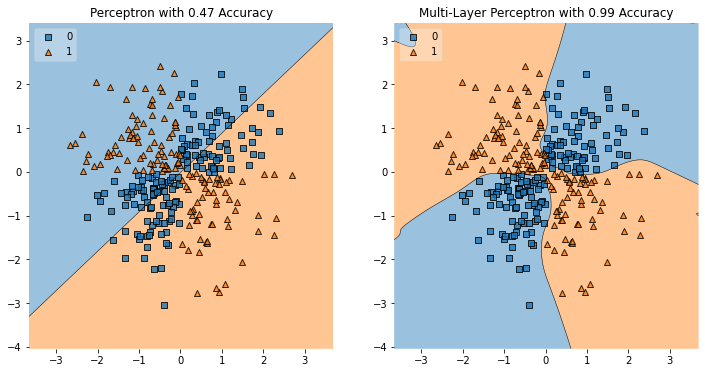

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

1) The single layer Perceptron in `model1` only achieves about 50% accuracy because it can only learn linear functions and therefore cannot handle data that is not linearly separable.

2) Since a multi-layer Perceptron has multiple layers it can learn nonlinear functions.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
68,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1


In [17]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

# YOUR CODE HERE
X = df.drop(columns='target')
Y = df.target

In [18]:
X.shape

(303, 13)

In [19]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [20]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [21]:
# Create a function named 'create_model' that returns a complied keras model -  required for KerasClassifier
# YOUR CODE HERE
def create_model(lr=0.01, opt='adam', act='relu'):
    
    opts = {'adam':Adam, 'sgd':SGD, 'adadelta':Adadelta, 'adamax':Adamax}
    
    opt = opts.get(opt, Adam)(learning_rate=lr)
    
    model = Sequential([
        Dense(64, input_dim=13, activation=act),
        Dense(32, activation=act),
        Dense(16, activation=act),
        Dense(8, activation=act),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer=opt)
    
    print(f'\n\nRUNNING MODEL WITH LEARNING_RATE({lr}) and ACTIVATION({act})')
    return model

In [22]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."



RUNNING MODEL WITH LEARNING_RATE(0.01) and ACTIVATION(relu)


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

stop = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=3)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

base_model = create_model()

base_model.fit(X_scaled, Y, epochs=20, verbose=1, validation_split=0.2, callbacks=[stop])

model_accuracies = base_model.history.history["val_accuracy"]

print(f'\n\nThe baseline accuracy for the model is {model_accuracies[-1]:0.4}')




RUNNING MODEL WITH LEARNING_RATE(0.01) and ACTIVATION(relu)
Epoch 1/20
8/8 [==============================] - 1s 66ms/step - loss: 0.6068 - accuracy: 0.6607 - val_loss: 0.4310 - val_accuracy: 0.8197
Epoch 2/20
8/8 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.8461 - val_loss: 0.3637 - val_accuracy: 0.8197
Epoch 3/20
8/8 [==============================] - 0s 16ms/step - loss: 0.3297 - accuracy: 0.8610 - val_loss: 0.3501 - val_accuracy: 0.8197
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 0.2705 - accuracy: 0.9016 - val_loss: 0.3253 - val_accuracy: 0.8361
Epoch 5/20
8/8 [==============================] - 0s 5ms/step - loss: 0.2607 - accuracy: 0.8756 - val_loss: 0.3514 - val_accuracy: 0.8033
Epoch 6/20
8/8 [==============================] - 0s 5ms/step - loss: 0.2520 - accuracy: 0.8732 - val_loss: 0.4096 - val_accuracy: 0.8361
Epoch 7/20
8/8 [==============================] - 0s 4ms/step - loss: 0.2108 - accuracy: 0.9080 - val_loss: 

In [24]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE

model = KerasClassifier(build_fn=create_model, epochs=20)

In [25]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

In [26]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

# YOUR CODE HERE
param_grid = {
    'act': ['relu', 'sigmoid'] ,
    'lr' : [1e-1, 1e-2],
}

In [27]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

In [28]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
# YOUR CODE HERE

gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        n_jobs=1,
        verbose=1,
        cv=3,
    )

grid_result = gs.fit(X_scaled, Y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


RUNNING MODEL WITH LEARNING_RATE(0.1) and ACTIVATION(relu)
Epoch 1/20
7/7 [==============================] - 0s 1ms/step - loss: 0.7188 - accuracy: 0.5317
Epoch 2/20
7/7 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.7412
Epoch 3/20
7/7 [==============================] - 0s 970us/step - loss: 0.4864 - accuracy: 0.8378
Epoch 4/20
7/7 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7591
Epoch 5/20
7/7 [==============================] - 0s 855us/step - loss: 0.4055 - accuracy: 0.8049
Epoch 6/20
7/7 [==============================] - 0s 931us/step - loss: 0.3167 - accuracy: 0.8813
Epoch 7/20
7/7 [==============================] - 0s 806us/step - loss: 0.2603 - accuracy: 0.8866
Epoch 8/20
7/7 [==============================] - 0s 902us/step - loss: 0.2703 - accuracy: 0.8638
Epoch 9/20
7/7 [==============================] - 0s 795us/step - loss: 0.2972 - accuracy: 0.8676
Epo

7/7 [==============================] - 0s 764us/step - loss: 0.0182 - accuracy: 0.9931
Epoch 19/20
7/7 [==============================] - 0s 766us/step - loss: 0.0112 - accuracy: 1.0000
Epoch 20/20
4/4 [==============================] - 0s 996us/step - loss: 1.4586 - accuracy: 0.8119


RUNNING MODEL WITH LEARNING_RATE(0.01) and ACTIVATION(relu)
Epoch 1/20
7/7 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.5895
Epoch 2/20
7/7 [==============================] - 0s 1ms/step - loss: 0.4503 - accuracy: 0.8553
Epoch 3/20
7/7 [==============================] - 0s 965us/step - loss: 0.3040 - accuracy: 0.8737
Epoch 4/20
7/7 [==============================] - 0s 902us/step - loss: 0.2288 - accuracy: 0.9167
Epoch 5/20
7/7 [==============================] - 0s 944us/step - loss: 0.1717 - accuracy: 0.9443
Epoch 6/20
7/7 [==============================] - 0s 797us/step - loss: 0.1290 - accuracy: 0.9590
Epoch 7/20
7/7 [==============================] - 0s 849us/step - los

7/7 [==============================] - 0s 789us/step - loss: 0.3364 - accuracy: 0.8902
Epoch 16/20
7/7 [==============================] - 0s 815us/step - loss: 0.3009 - accuracy: 0.9009
Epoch 17/20
7/7 [==============================] - 0s 756us/step - loss: 0.2944 - accuracy: 0.9154
Epoch 18/20
7/7 [==============================] - 0s 765us/step - loss: 0.3526 - accuracy: 0.8905
Epoch 19/20
7/7 [==============================] - 0s 774us/step - loss: 0.2878 - accuracy: 0.9184
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5938 - accuracy: 0.7921


RUNNING MODEL WITH LEARNING_RATE(0.1) and ACTIVATION(sigmoid)
Epoch 1/20
7/7 [==============================] - 0s 1ms/step - loss: 0.8127 - accuracy: 0.5348
Epoch 2/20
7/7 [==============================] - 0s 1ms/step - loss: 0.6606 - accuracy: 0.5886
Epoch 3/20
7/7 [==============================] - 0s 890us/step - loss: 0.4851 - accuracy: 0.8331
Epoch 4/20
7/7 [==============================] - 0s 899us/step - 

7/7 [==============================] - 0s 799us/step - loss: 0.6591 - accuracy: 0.5512
Epoch 13/20
7/7 [==============================] - 0s 799us/step - loss: 0.6396 - accuracy: 0.7978
Epoch 14/20
7/7 [==============================] - 0s 784us/step - loss: 0.5928 - accuracy: 0.8592
Epoch 15/20
7/7 [==============================] - 0s 823us/step - loss: 0.5414 - accuracy: 0.8598
Epoch 16/20
7/7 [==============================] - 0s 807us/step - loss: 0.4833 - accuracy: 0.8751
Epoch 17/20
7/7 [==============================] - 0s 846us/step - loss: 0.4532 - accuracy: 0.8719
Epoch 18/20
7/7 [==============================] - 0s 765us/step - loss: 0.4258 - accuracy: 0.8834
Epoch 19/20
7/7 [==============================] - 0s 767us/step - loss: 0.4149 - accuracy: 0.8734
Epoch 20/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5120 - accuracy: 0.7822


RUNNING MODEL WITH LEARNING_RATE(0.1) and ACTIVATION(sigmoid)
Epoch 1/20
10/10 [==============================] - 0s 1ms/

In [29]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8283828298250834 using {'act': 'sigmoid', 'lr': 0.1}
Means: 0.7887788812319437, Stdev: 0.01866948040798165 with: {'act': 'relu', 'lr': 0.1}
Means: 0.8052805264790853, Stdev: 0.01682844222431205 with: {'act': 'relu', 'lr': 0.01}
Means: 0.8283828298250834, Stdev: 0.028390503971451875 with: {'act': 'sigmoid', 'lr': 0.1}
Means: 0.8283828298250834, Stdev: 0.0459682644429074 with: {'act': 'sigmoid', 'lr': 0.01}


In [30]:
grid_result.best_estimator_.model.evaluate(X_scaled, Y)

10/10 [==============================] - 0s 772us/step - loss: 0.2927 - accuracy: 0.8746


[0.2926810383796692, 0.8745874762535095]